# Continuous Control
---

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from agent.agent import Agent
import torch

from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [5]:
agent = Agent(state_size, action_size, seed=42)

agent using cpu device


In [6]:
def ddpg(n_episodes=1000, max_t=700):
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    scores_deque = deque(maxlen=100)
    scores_list = [] # initialize the score (for each agent)
    for i_episode in range(1, n_episodes+1):
        states = env_info.vector_observations   # get the current state (for each agent)
        agent.reset()
        scores = np.zeros(num_agents) 
        while True:
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            scores += rewards
            if np.any(dones):
                break 
        scores_deque.append(scores.mean())
        scores_list.append(scores.mean())
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), scores.mean()), end="")
        if i_episode % 10 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
    return scores_list

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

C:\Users\mateo\miniconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 10	Average Score: 1.64	Score: 1.00
Episode 20	Average Score: 1.19	Score: 0.30
Episode 30	Average Score: 0.88	Score: 0.00
Episode 40	Average Score: 0.66	Score: 0.00
Episode 50	Average Score: 0.54	Score: 0.00
Episode 60	Average Score: 0.45	Score: 0.00
Episode 70	Average Score: 0.39	Score: 0.00
Episode 80	Average Score: 0.34	Score: 0.00
Episode 90	Average Score: 0.31	Score: 0.00
Episode 100	Average Score: 0.27	Score: 0.00
Episode 110	Average Score: 0.12	Score: 0.00
Episode 120	Average Score: 0.05	Score: 0.00
Episode 130	Average Score: 0.02	Score: 0.00
Episode 140	Average Score: 0.03	Score: 0.00
Episode 150	Average Score: 0.02	Score: 0.00
Episode 160	Average Score: 0.03	Score: 0.30
Episode 170	Average Score: 0.03	Score: 0.00
Episode 175	Average Score: 0.03	Score: 0.00

KeyboardInterrupt: 

NameError: name 'scores_list' is not defined

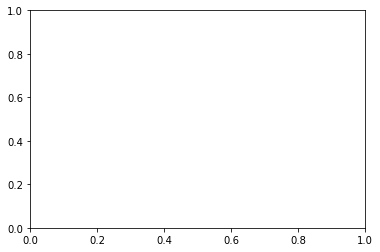

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_list)+1), score_list)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [7]:
env.close()